In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/jlh/global-health-map/data/separated_gender.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Location,Period,Gender,Life_Expectancy,Healthy_Life_Expectancy,%Mrt30_70_crdo_cncr_dbts_rsprtry,Suicide100000,Ttl_alc_percapita_15+,Posioning100000,Smoking15+
0,Albania,2015,Male,76.10,67.99,20.9,7.6,10.92,0.48,51.4
1,Albania,2015,Female,79.69,70.12,13.7,4.4,2.53,0.37,8.3
2,Albania,2010,Male,74.23,66.34,22.3,9.5,12.47,0.59,53.2
3,Albania,2010,Female,78.31,68.85,14.6,6.1,2.98,0.44,9.1
4,Albania,2000,Male,70.65,63.15,23.1,7.4,10.60,1.29,57.4


In [18]:
X = df.drop(columns=['Location', 'Period', 'Gender'])
y = df["Gender"]
print(X.shape, y.shape)

(860, 7) (860,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
label_encoder.fit(y_test)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [21]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
hot_y_train = to_categorical(encoded_y_train)
hot_y_test = to_categorical(encoded_y_test)
hot_y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
model.fit(X_train, hot_y_train)
training_score = model.score(X_train, hot_y_train)
testing_score = model.score(X_test, hot_y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7494672582612603
Testing Score: 0.7764389655318175


Text(0.5, 1.0, 'Residual Plot')

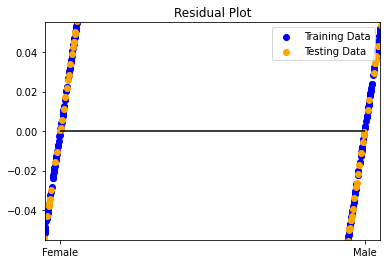

In [27]:
plt.scatter(model.predict(X_train), model.predict(X_train) - hot_y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - hot_y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [ ]:
#This is not right - abandon